In [10]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [15]:
data_vis = "../sources/gpd_dia_V1.csv"

gdpd = pd.read_csv(data_vis, encoding = "utf-8")
data_df = pd.DataFrame(gdpd)
data_df


,Country Name,Code,Year,Deaths - Cause: Diarrheal diseases - Risk: Child growth failure - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: No access to handwashing facility - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Suboptimal breastfeeding - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Unsafe water source - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Zinc deficiency - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Low birth weight - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Short gestation - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Unsafe sanitation - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Vitamin A deficiency - Sex: Both - Age: Under 5 (Number),Total Deaths,GDP per capita (US$)
0,Afghanistan,AFG,2015,4053,1265,1356,4598,69,480,338,3238,314,15711,556.007221
1,Afghanistan,AFG,2016,3952,1227,1316,4483,68,463,327,3142,297,15275,512.012778
2,Afghanistan,AFG,2017,3908,1209,1290,4437,67,461,325,3095,285,15077,516.679862
3,Afghanistan,AFG,2018,3345,1031,1099,3807,55,401,283,2641,238,12900,485.668419
4,Afghanistan,AFG,2019,3139,963,1004,3568,53,368,261,2466,220,12042,494.179350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,Zimbabwe,ZWE,2015,949,415,326,1140,5,64,57,759,62,3777,1445.069702
862,Zimbabwe,ZWE,2016,904,396,305,1088,5,59,53,719,57,3586,1464.588957
863,Zimbabwe,ZWE,2017,875,383,295,1054,5,58,52,692,53,3467,1235.189032
864,Zimbabwe,ZWE,2018,794,348,269,957,4,53,48,624,47,3144,1254.642265


In [13]:
lower = "../sources/country_capita_gdp_amend.csv"

least = pd.read_csv(lower, encoding = "utf-8")
lower_df = least

In [20]:
lower_df.columns

Index(['Entity', 'Code', 'Year',
       'Deaths - Cause: Diarrheal diseases - Risk: Unsafe water source - Sex: Both - Age: Under 5 (Number)',
       'Deaths - Cause: Diarrheal diseases - Risk: No access to handwashing facility - Sex: Both - Age: Under 5 (Number)'],
      dtype='object')

In [21]:
unsafe_water = lower_df["Deaths - Cause: Diarrheal diseases - Risk: Unsafe water source - Sex: Both - Age: Under 5 (Number)"]

In [22]:
handwash = lower_df["Deaths - Cause: Diarrheal diseases - Risk: No access to handwashing facility - Sex: Both - Age: Under 5 (Number)"]

In [19]:
bottom_gdp = data_df.copy()
bottom_gdp_s = bottom_gdp.loc[(bottom_gdp["Country Name"] == "Burundi") | (bottom_gdp["Country Name"] == "Madagascar")| (bottom_gdp["Country Name"] == "Malawi") | (bottom_gdp["Country Name"] == "Mozambique") |(bottom_gdp["Country Name"] == "Somalia")]
bottom_gdp_s

,Country Name,Code,Year,Deaths - Cause: Diarrheal diseases - Risk: Child growth failure - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: No access to handwashing facility - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Suboptimal breastfeeding - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Unsafe water source - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Zinc deficiency - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Low birth weight - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Short gestation - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Unsafe sanitation - Sex: Both - Age: Under 5 (Number),Deaths - Cause: Diarrheal diseases - Risk: Vitamin A deficiency - Sex: Both - Age: Under 5 (Number),Total Deaths,GDP per capita (US$)
135,Burundi,BDI,2015,5099,2099,564,5498,130,344,257,4094,243,18328,305.511144
136,Burundi,BDI,2016,4629,1919,508,5028,116,343,257,3743,218,16761,251.651477
137,Burundi,BDI,2017,4368,1820,482,4768,107,347,261,3549,202,15904,250.514601
138,Burundi,BDI,2018,4596,1907,495,4995,114,348,263,3717,212,16647,238.034310
139,Burundi,BDI,2019,4493,1868,484,4894,112,348,265,3640,207,16311,223.862876
455,Madagascar,MDG,2015,11305,4464,2333,11819,60,1016,791,9145,647,41580,467.235432
456,Madagascar,MDG,2016,10642,4217,2192,11158,56,979,765,8632,589,39230,475.955557
457,Madagascar,MDG,2017,10338,4103,2099,10848,54,950,744,8390,553,38079,515.293323
458,Madagascar,MDG,2018,9593,3818,1943,10088,50,894,702,7798,500,35386,518.401123
459,Madagascar,MDG,2019,8899,3556,1818,9395,45,855,673,7260,454,32955,526.224572


In [23]:
gdp = bottom_gdp_s["GDP per capita (US$)"]

In [30]:
deaths = bottom_gdp_s["Total Deaths"]

{0.08}
The r-squared is: 0.0067548162198132105


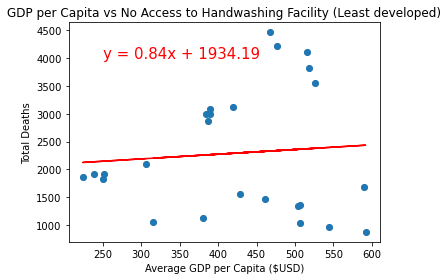

In [27]:
plt.figure()
plt.scatter(gdp,handwash, marker="o", color="silver")
plt.title("GDP per Capita vs No Access to Handwashing Facility (Least developed)")
plt.xlabel("Average GDP per Capita ($USD)")
plt.ylabel("Total Deaths")
plt.tight_layout()

x_values = gdp
y_values = handwash
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(250, 4000),fontsize=15,color="red")
correlation =st.pearsonr(x_values, y_values)
print({round(correlation[0], 2)})
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Visuals/Scatters/lowhandwashreg.png")

{0.09}
The r-squared is: 0.007974774297843903


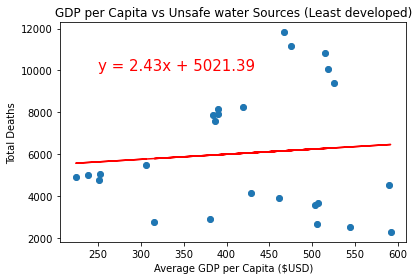

In [29]:
plt.figure()
plt.scatter(gdp,unsafe_water, marker="o", color="silver")
plt.title("GDP per Capita vs Unsafe water Sources (Least developed)")
plt.xlabel("Average GDP per Capita ($USD)")
plt.ylabel("Total Deaths")
plt.tight_layout()

x_values = gdp
y_values = unsafe_water
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(250, 10000),fontsize=15,color="red")
correlation =st.pearsonr(x_values, y_values)
print({round(correlation[0], 2)})
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Visuals/Scatters/unsafewaterreg.png")

{0.1}
The r-squared is: 0.009503894924761253


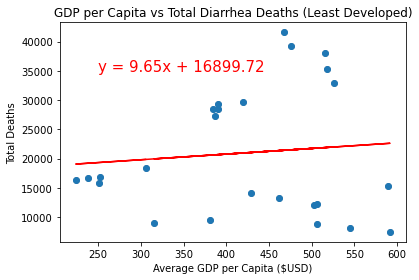

In [33]:
plt.figure()
plt.scatter(gdp,deaths, marker="o", color="silver")
plt.title("GDP per Capita vs Total Diarrhea Deaths (Least Developed)")
plt.xlabel("Average GDP per Capita ($USD)")
plt.ylabel("Total Deaths")
plt.tight_layout()

x_values = gdp
y_values = deaths
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(250, 35000),fontsize=15,color="red")
correlation =st.pearsonr(x_values, y_values)
print({round(correlation[0], 2)})
print(f"The r-squared is: {rvalue**2}")
plt.savefig("../Visuals/Scatters/deathsreg.png")